# Networks: structure, evolution & processes
**Internet Analytics - Lab 2**

---

**Group:** *P*

**Names:**

* *Matthias Leroy*
* *Alexandre Poussard*
* *Pierre Fouche*

---

#### Instructions

*This is a template for part 1 of the lab. Clearly write your answers, comments and interpretations in Markodown cells. Don't forget that you can add $\LaTeX$ equations in these cells. Feel free to add or remove any cell.*

*Please properly comment your code. Code readability will be considered for grading. To avoid long cells of codes in the notebook, you can also embed long python functions and classes in a separate module. Don’t forget to hand in your module if that is the case. In multiple exercises, you are required to come up with your own method to solve various problems. Be creative and clearly motivate and explain your methods. Creativity and clarity will be considered for grading.*

---

## 2.1 Exploration of real networks

#### Exercise 2.1

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import collections as cl

In [2]:
#1) We load the graph with networkx
graph1 = nx.read_edgelist('../data/network1.csv', delimiter = ",")

In [3]:
#2) We compute the number of edges and nodes of network1
nbr_edges = nx.number_of_edges(graph1)
nbr_nodes = nx.number_of_nodes(graph1)
print(nbr_edges, nbr_nodes)

18584 13033


2) The network has 13033 nodes and 18584 edges

#### Exercise 2.2:  Node degree distribution

In [4]:
def degreeDistribution(graph):
    #Get a dictionary where the key is the node and the value its degree
    degree = graph.degree(graph.nodes())
    sortedDegreeValues = sorted(list(degree.values()))
    
    #To get the degree distribution we use this function that sum occurrences of words in a list and return a dictionary where the key is a degree and the value the number of nodes with this degree
    degreeCount = cl.Counter(sortedDegreeValues)
    
    #In order to correctly visualize the node degree distribution we have to use a log scaling on both axis
    plt.loglog(list(degreeCount.values()))
    plt.title("Log-log degree distribution plot", fontsize=15)
    plt.xlabel("Degree", fontsize=10)
    plt.ylabel("Number of nodes", fontsize=10)
    plt.grid()
    plt.show()

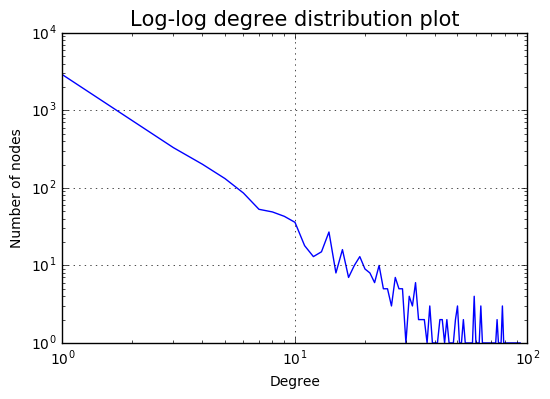

In [5]:
degreeDistribution(graph1)

1) The distribution is widely distributed with big values that is why we have to plot using a logarithmic scale for both axis.
We can use a loglog plot of pyplot in order to do this.

In [6]:
#We can find the mean, variance and standard deviation of the degree distribution
sortedDegreeValues = sorted(list(graph1.degree(graph1.nodes()).values()))
mean = np.mean(sortedDegreeValues)
var = np.var(sortedDegreeValues)
std = np.std(sortedDegreeValues)
print(mean, var, std)

2.85183764291 435.133499462 20.8598537737


2) The mean, the variance and the standart deviation of the degree distibution are respectively and approximately : 2.85, 435.13 and 20.86

3) The node degree distribution seems to be Pareto distribution. The scale parameter $x_m$ is equal to 1 (the smallest possible value). And the shape parameter $\alpha$ is equal to 1.54. In fact the expected value of a Pareto distribution is $E(x)=\frac{\alpha \dot x_m}{\alpha - 1}$. Thus with $E(x)=2.85$ we find $\alpha=1.54$.

#### Exercise 2.3: Giant component

In [7]:
def giantComponent(graph):
    #We get the number of connected components
    nbConnectedComponent = nx.number_connected_components(graph)
    print(nbConnectedComponent)

    #In order to find if there is a giant component in the graph we can start by finding all its connected components
    conComponent = nx.connected_component_subgraphs(graph)
    #Then we find the component  with the larger number of edges
    giant = max(conComponent, key=nx.number_of_edges)
    #We get the size of the bigger component if this number is enough we can say that is a giant component
    size = nx.number_of_edges(giant)
    print(size)

In [8]:
giantComponent(graph1)

192
18317


1) There are 192 connected components in network1.

2) There is a giant component, its size (number of edges) is 18317.

#### Exercise 2.4: Short paths & Small-worlds

In [9]:
def shortPaths(graph):
    #Create a dictionary of dictionaries with the length of the shortest path between all the nodes
    dicPath = nx.all_pairs_shortest_path_length(graph)
    path = []
    #Extract all the length
    for value in dicPath.values():
        path.extend(list(value.values()))
    #Count the different occurences of length
    distribPath = cl.Counter(path)
    #Plot the distribution of length
    plt.plot(list(distribPath.values()))
    plt.title("Distribution of path length between any two nodes", fontsize=10)
    plt.xlabel("Length of paths", fontsize=10)
    plt.ylabel("Number of paths", fontsize=10)
    plt.show()
    #Compute the average numbers of nodes reachable from a node in 6 hops
    sum = 0
    for i in range(6):
        sum += distribPath[i+1]
    return sum/nx.number_of_nodes(graph)

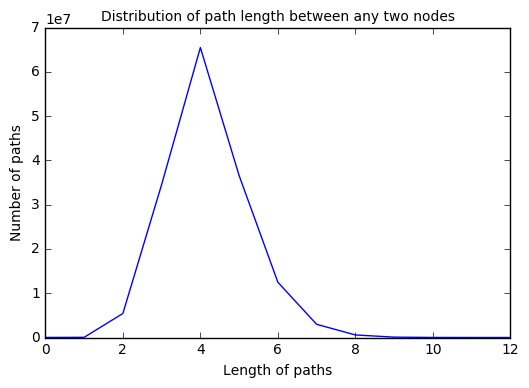

11854.368449320955


In [10]:
average = shortPaths(graph1)
print(average)

We can see that the length of the shortest distance between any two nodes of the graph is between 1 and 6. Moreover we reach, in average, almost every nodes in the graph (12 000) from any nodes of the graph in 6 hops. So we can conclude that this graph is a small world


#### Exercise 2.5: Network comparison

43516 26542
5
43437


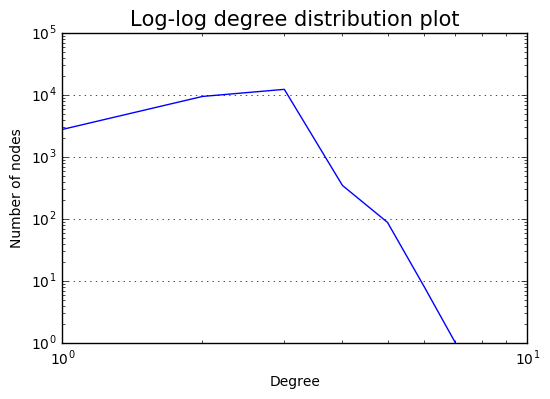

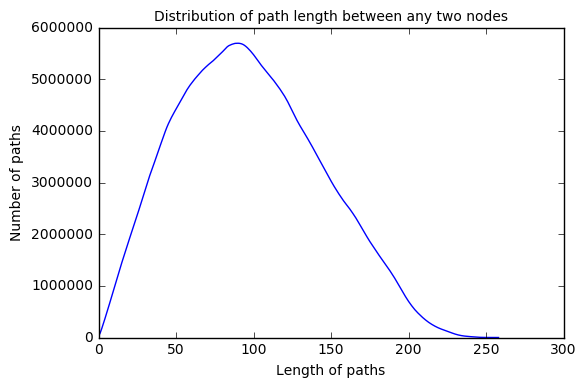

71.0516916585035


In [11]:
graph2 = nx.read_edgelist('../data/network2.csv', delimiter = ",")
nbr_edges2 = nx.number_of_edges(graph2)
nbr_nodes2 = nx.number_of_nodes(graph2)
print(nbr_edges2, nbr_nodes2)

giantComponent(graph2)

degreeDistribution(graph2)
average2 = shortPaths(graph2)
print(average2)

The network has 43516 edges and 26542 nodes. 
There are 5 connected components in network2, one is a giant component, its size (number of edges) is 43437.
We can see that the length of the shortest distance between any two nodes of the graph is much bigger than 6. Moreover we reach, in average, 71 nodes from any nodes of the graph in 6 hops, which is far away of the total number of nodes. So we can conclude that this graph is not a small world.


#### Exercise 2.6: Network identification

We can say that the network2 is the network of the road around New-York. Indeed the degree distribution of the first graph, shows nodes with degree superior at 100 which is impossible for a network of road. The degree distribution of the secound graph shows that all the nodes have a degree between 1 and 8. So the network of the road of New-York must be the second one.